# Работа с временными рядами

Отличная статья про временные ряды от Дмитрия Сергеева - https://habr.com/company/ods/blog/327242/. 

**Временной ряд** - последовательно измеренные через некоторые (зачастую равные) промежутки времени данные.

Обычно в задачах анализа данных предполагается независимость наблюдений. При работе с временными рядами мы строим свой прогноз на основе наблюдений из прошлого.

Компоненты временного ряда:
- Тренд - систематическая линейная или нелинейная компонента, изменяющаяся во времени.
- Сезонность - периодические колебания уровней временного ряда внутри года (например).
- Цикл - периодические колебания, как правило, больше, чем один сезоннный период, не имеют определенной продолжительности.
- Ошибка - непрогнозируемая компонента.

<img width = '800px' src="images/lesson_10/tss.png">

In [1]:
import pandas as pd 
import datetime
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from pylab import rcParams


%matplotlib inline

Будем рассматривать 2 датасета: 
1. кол-во полетов по месяцам 
2. заказы одного из ресторанов на платформе DC

In [135]:
flights = pd.read_csv('files/lesson_10/international-airline-passengers.csv', sep =',').dropna()
flights.columns = ['month', 'flights']

flights['month'] = pd.to_datetime(flights.month,format='%Y-%m') 
flights.index  = flights.month
flights.drop('month', axis = 1, inplace = True)

train_flights = flights.sort_values('month', ascending = True).iloc[:-8]
test_flights = flights.sort_values('month', ascending = True).iloc[-8:]

train_flights.head(2)

,flights
month,
1949-01-01,112.0
1949-02-01,118.0


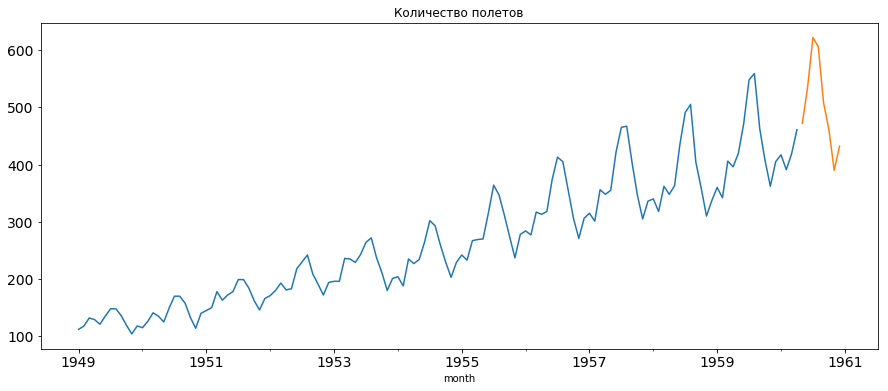

In [136]:
train_flights.flights.plot( figsize=(15,6),title= 'Количество полетов', fontsize=14)
test_flights.flights.plot( figsize=(15,6),title= 'Количество полетов', fontsize=14)

In [137]:
restaurant_orders = pd.read_csv('files/lesson_10/restaurant_orders.csv', sep =';').dropna()

restaurant_orders['date'] = pd.to_datetime(restaurant_orders.date,format='%d.%m.%Y') 
restaurant_orders.index  = restaurant_orders.date
restaurant_orders.drop('date', axis = 1, inplace = True)

train_orders = restaurant_orders.sort_values('date', ascending = True).iloc[:-23]
test_orders = restaurant_orders.sort_values('date', ascending = True).iloc[-23:]

train_orders.head(3)

,orders
date,
2017-01-01,823
2017-01-02,878
2017-01-03,951


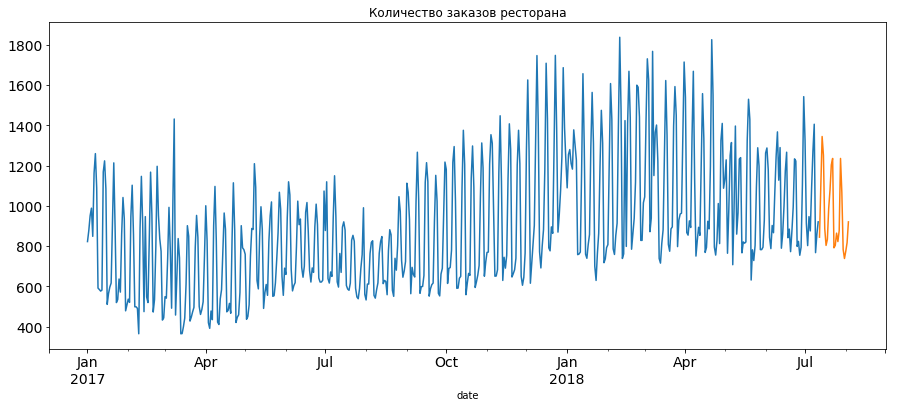

In [138]:
train_orders.orders.plot( figsize=(15,6),title= 'Количество заказов ресторана', fontsize=14)
test_orders.orders.plot( figsize=(15,6),title= 'Количество заказов ресторана', fontsize=14)

**Компоненты временного ряда**

Наш временной ряд раскладывается на отдельные компоненты, работая по отдельности с каждой из них будет проще строить прогноз. 

$Y_t = f(Trend, Seasonality,Cycle,Reminder) $

<img width = '500px' src="images/lesson_10/paintings.jpg">

Отдельные компоненты временного ряда очень похожи на краски, которые смешиваются и получается определенный цвет (наш исходный временной ряд).

##### 1. Тренд

Тренд можно извлечь с помощью скользящей средней по исходному временному ряду. 

$ MA =  \frac{1} {2m} \sum_{i=-1}^m (Y_{t+i}) $

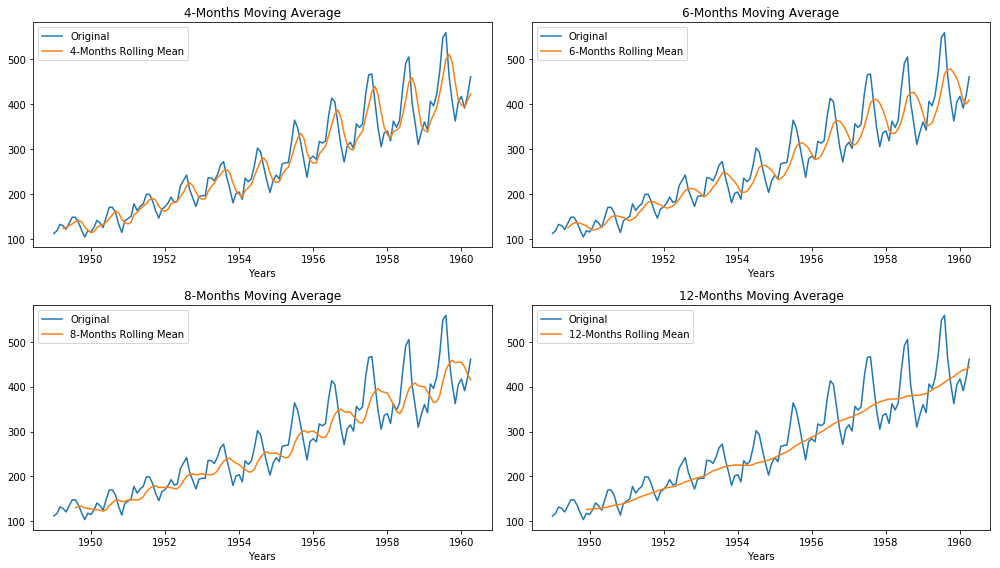

In [7]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(train_flights.index, train_flights, label='Original')
axes[0][0].plot(train_flights.index, train_flights.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(train_flights.index, train_flights, label='Original')
axes[0][1].plot(train_flights.index, train_flights.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(train_flights.index, train_flights, label='Original')
axes[1][0].plot(train_flights.index, train_flights.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(train_flights.index, train_flights, label='Original')
axes[1][1].plot(train_flights.index, train_flights.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

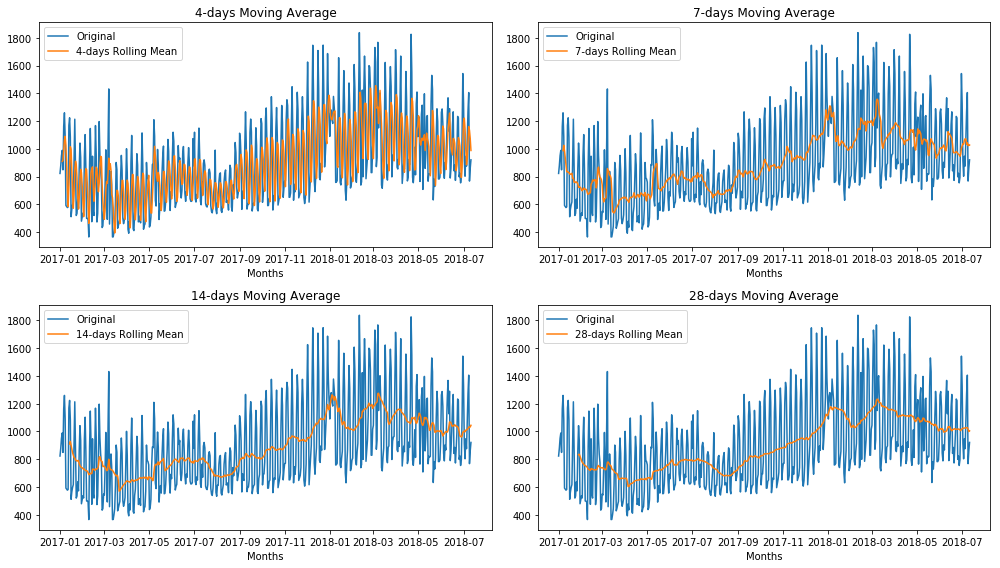

In [8]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(train_orders.index, train_orders, label='Original')
axes[0][0].plot(train_orders.index, train_orders.rolling(window=4).mean(), label='4-days Rolling Mean')
axes[0][0].set_xlabel("Months")
axes[0][0].set_title("4-days Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(train_orders.index, train_orders, label='Original')
axes[0][1].plot(train_orders.index, train_orders.rolling(window=7).mean(), label='7-days Rolling Mean')
axes[0][1].set_xlabel("Months")
axes[0][1].set_title("7-days Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(train_orders.index, train_orders, label='Original')
axes[1][0].plot(train_orders.index, train_orders.rolling(window=14).mean(), label='14-days Rolling Mean')
axes[1][0].set_xlabel("Months")
axes[1][0].set_title("14-days Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(train_orders.index, train_orders, label='Original')
axes[1][1].plot(train_orders.index, train_orders.rolling(window=28).mean(), label='28-days Rolling Mean')
axes[1][1].set_xlabel("Months")
axes[1][1].set_title("28-days Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

#### 2. Сезонность

In [9]:
rcParams['figure.figsize'] = 20, 10
train_flights['year'] = train_flights.index.year
train_flights['month'] = train_flights.index.month
train_flights_pivot = pd.pivot_table(train_flights, values = "flights", columns = "year", index = "month")

C:\Users\k.izmailov\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'month' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


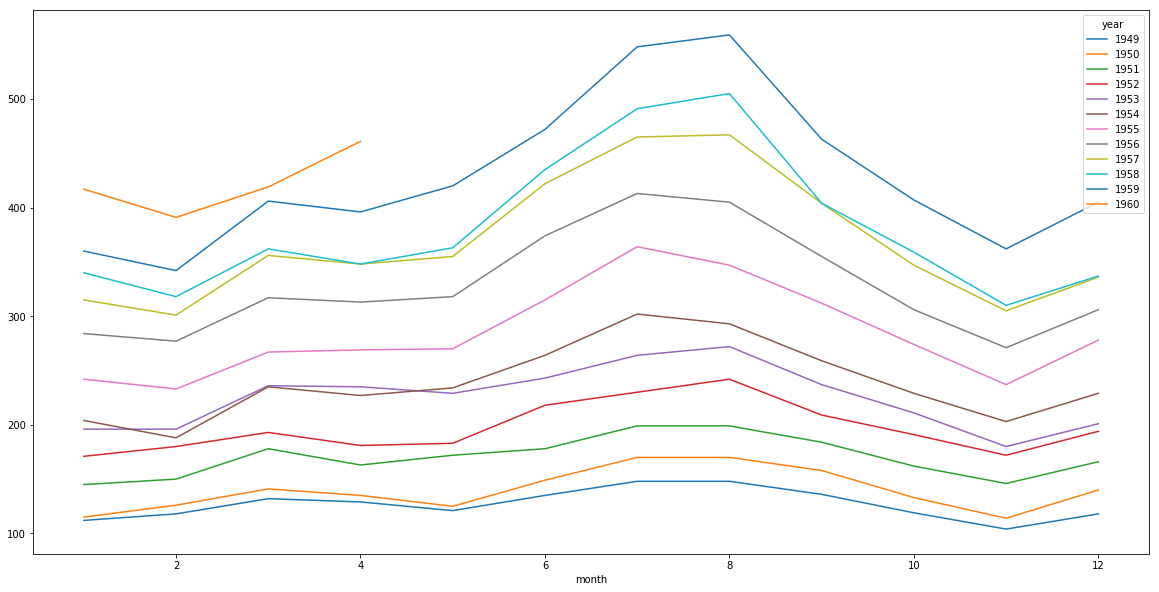

In [10]:
train_flights_pivot.plot()

In [11]:
train_orders['weekday'] = train_orders.index.weekday
train_orders['week'] = train_orders.index.week
train_orders_pivot = pd.pivot_table(train_orders, values = "orders", columns = "week", index = "weekday")

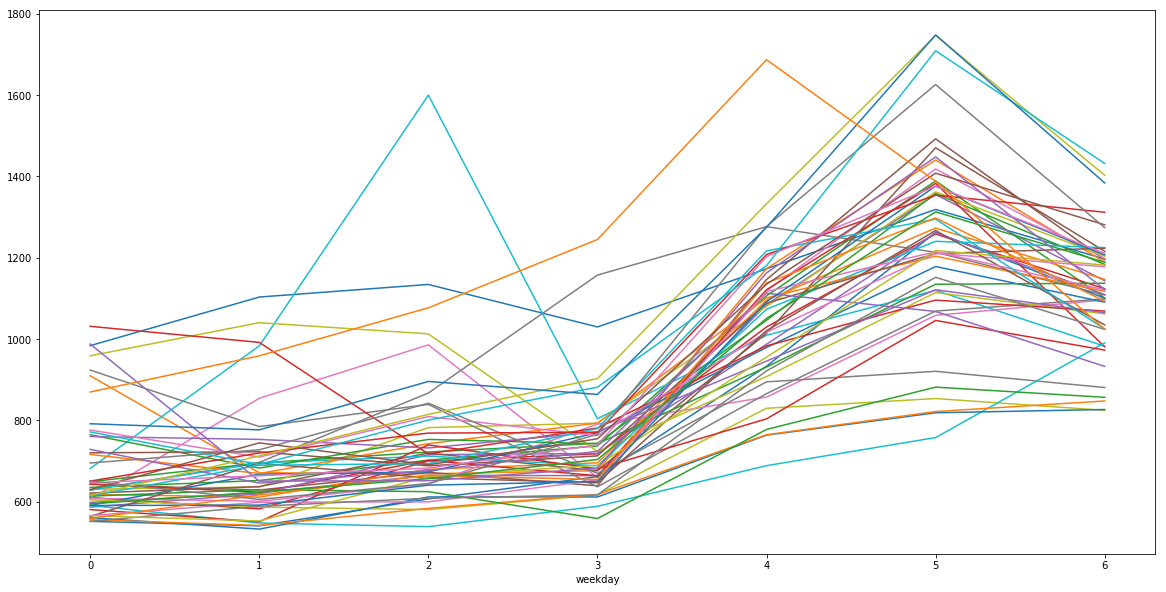

In [12]:
train_orders_pivot.plot(legend = False)

##### 3. Остатки

То, что осталось после удаления сезонности и тренда, остаки должны напоминать белый шум.

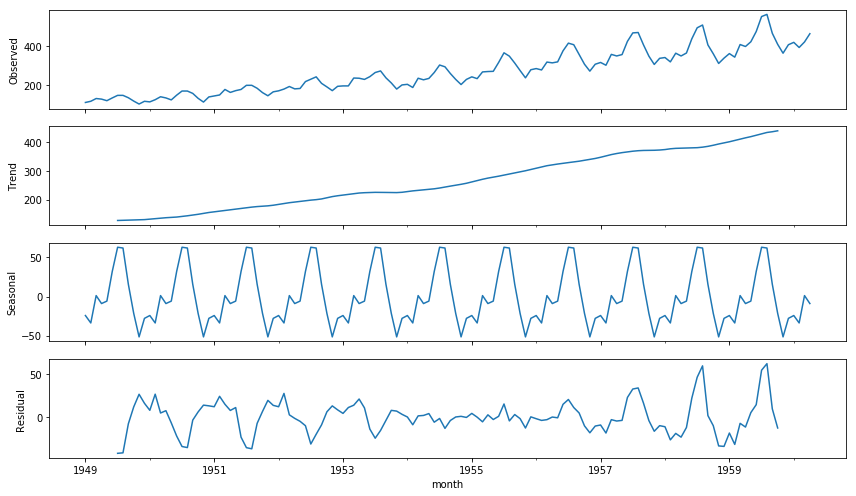

In [13]:
# STL-декомпозиция ряда
rcParams['figure.figsize'] = 12, 7
sm.tsa.seasonal_decompose(train_flights.flights).plot()
plt.show()

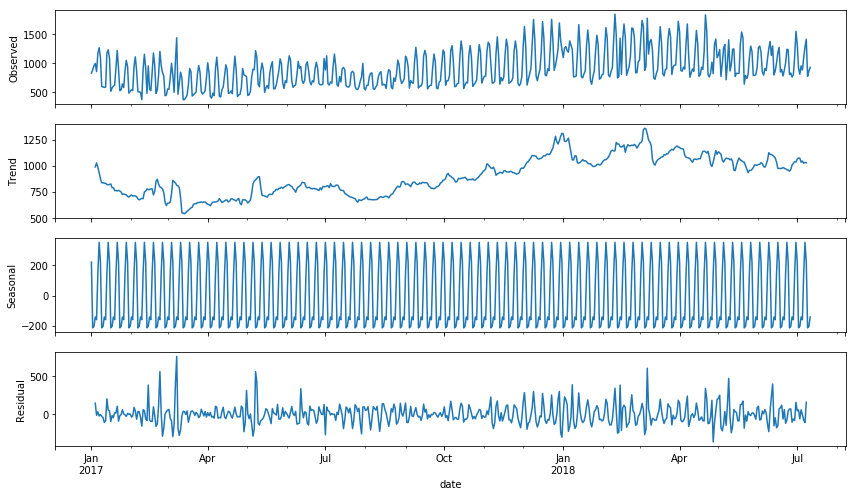

In [14]:
# STL-декомпозиция ряда
rcParams['figure.figsize'] = 12, 7
sm.tsa.seasonal_decompose(train_orders.orders).plot()
plt.show()

Перед тем как применять статистическую модель для временного ряда необходимо убедиться, что ряд стационарен.

**Стационарность** — свойство процесса не менять свои характеристики со временем. Временной ряд стаицонарен, если его свойства не зависят от времени.

- постоянство матожидания

<img width = '500px' src="images/lesson_10/stat1.png">

- постоянство дисперсии (она же гомоскедастичность)

<img width = '500px' src="images/lesson_10/stat2.png">

- независимость ковариационной функции от времени (должна зависеть только от расстояния между наблюдениями)

<img width = '500px' src="images/lesson_10/stat3.png">

Зачем?

- По стационарному ряду просто строить прогноз, так как мы полагаем, что его будущие статистические характеристики не будут отличаться от наблюдаемых текущих.

Как определить стационарность?

- визуально изучить плавающее среднее, плавающее стандартное отклонеение

- применить статистический тест 

In [365]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.values,autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

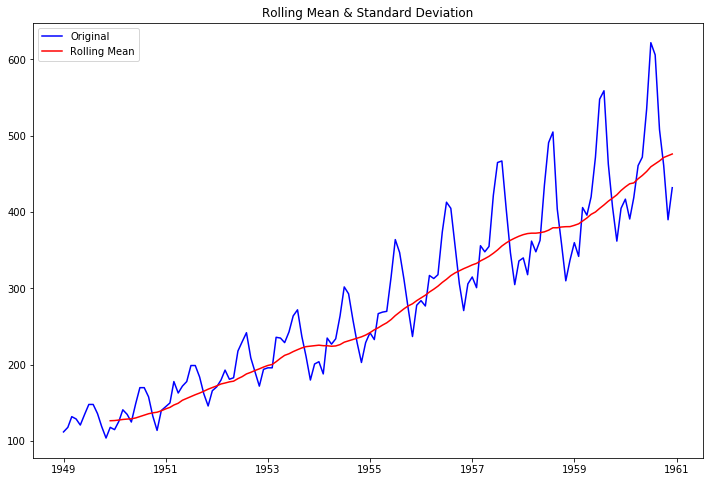

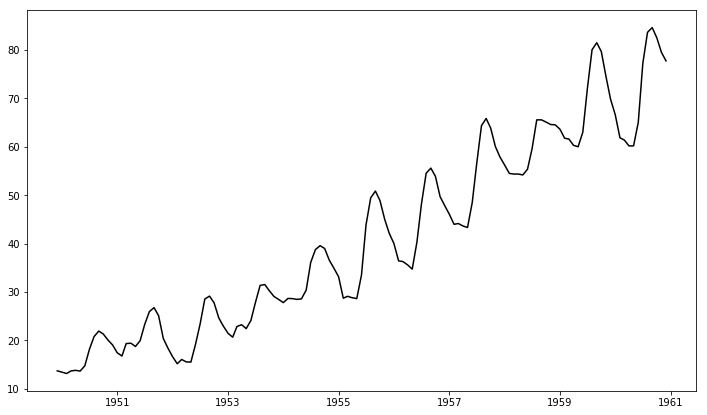

Results of Dickey-Fuller Test:
p-value = 0.9919. The series is likely non-stationary.
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [366]:
test_stationarity(flights.flights)

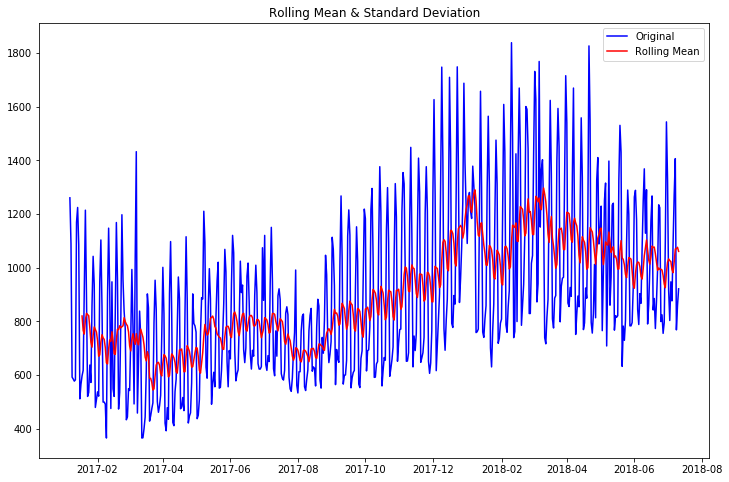

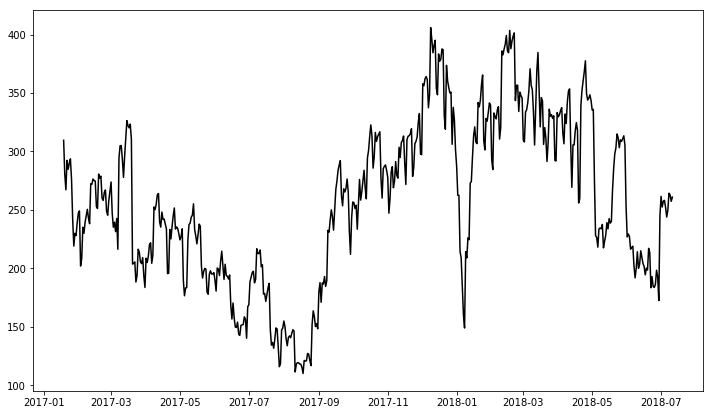

Results of Dickey-Fuller Test:
p-value = 0.6149. The series is likely non-stationary.
Test Statistic                  -1.331042
p-value                          0.614854
#Lags Used                      19.000000
Number of Observations Used    531.000000
Critical Value (1%)             -3.442725
Critical Value (5%)             -2.866998
Critical Value (10%)            -2.569677
dtype: float64


In [367]:
test_stationarity(train_orders.orders)

Временной ряд **нестационарен**.

Подходы для того чтобы сделать временной ряд стационарным:
- в случае непостоянства дисперсии - логарифмирование либо преобразование Бокса-Кокса;
- почти всегда помогает дифференцирование (переход к попарным разностям ряда): стабилизирует среднее значение ряда, может применяться неоднократно, выделяют также сезонное дифференцирование - попарная разность по сезонам.

**Корреляция** (Пирсона) - сила линейной взаимосвязи между двумя случайными величинами.

Формула выборочной корреляции:
    
 $r_{X_1, X_2}  =\frac{ \sum_{i=1}^n (X_{1i} - \overline{X_1})(X_{2i} - \overline{X_2})}  {\sqrt{\sum_{i=1}^n (X_{1i} - \overline{X_1})^2\sum_{i=1}^n (X_{2i} - \overline{X_2})^2}} $   
 
 **Автокорреляция** (последовательная корреляция) - корреляция между последовательными показателями, упорядоченными во времени.

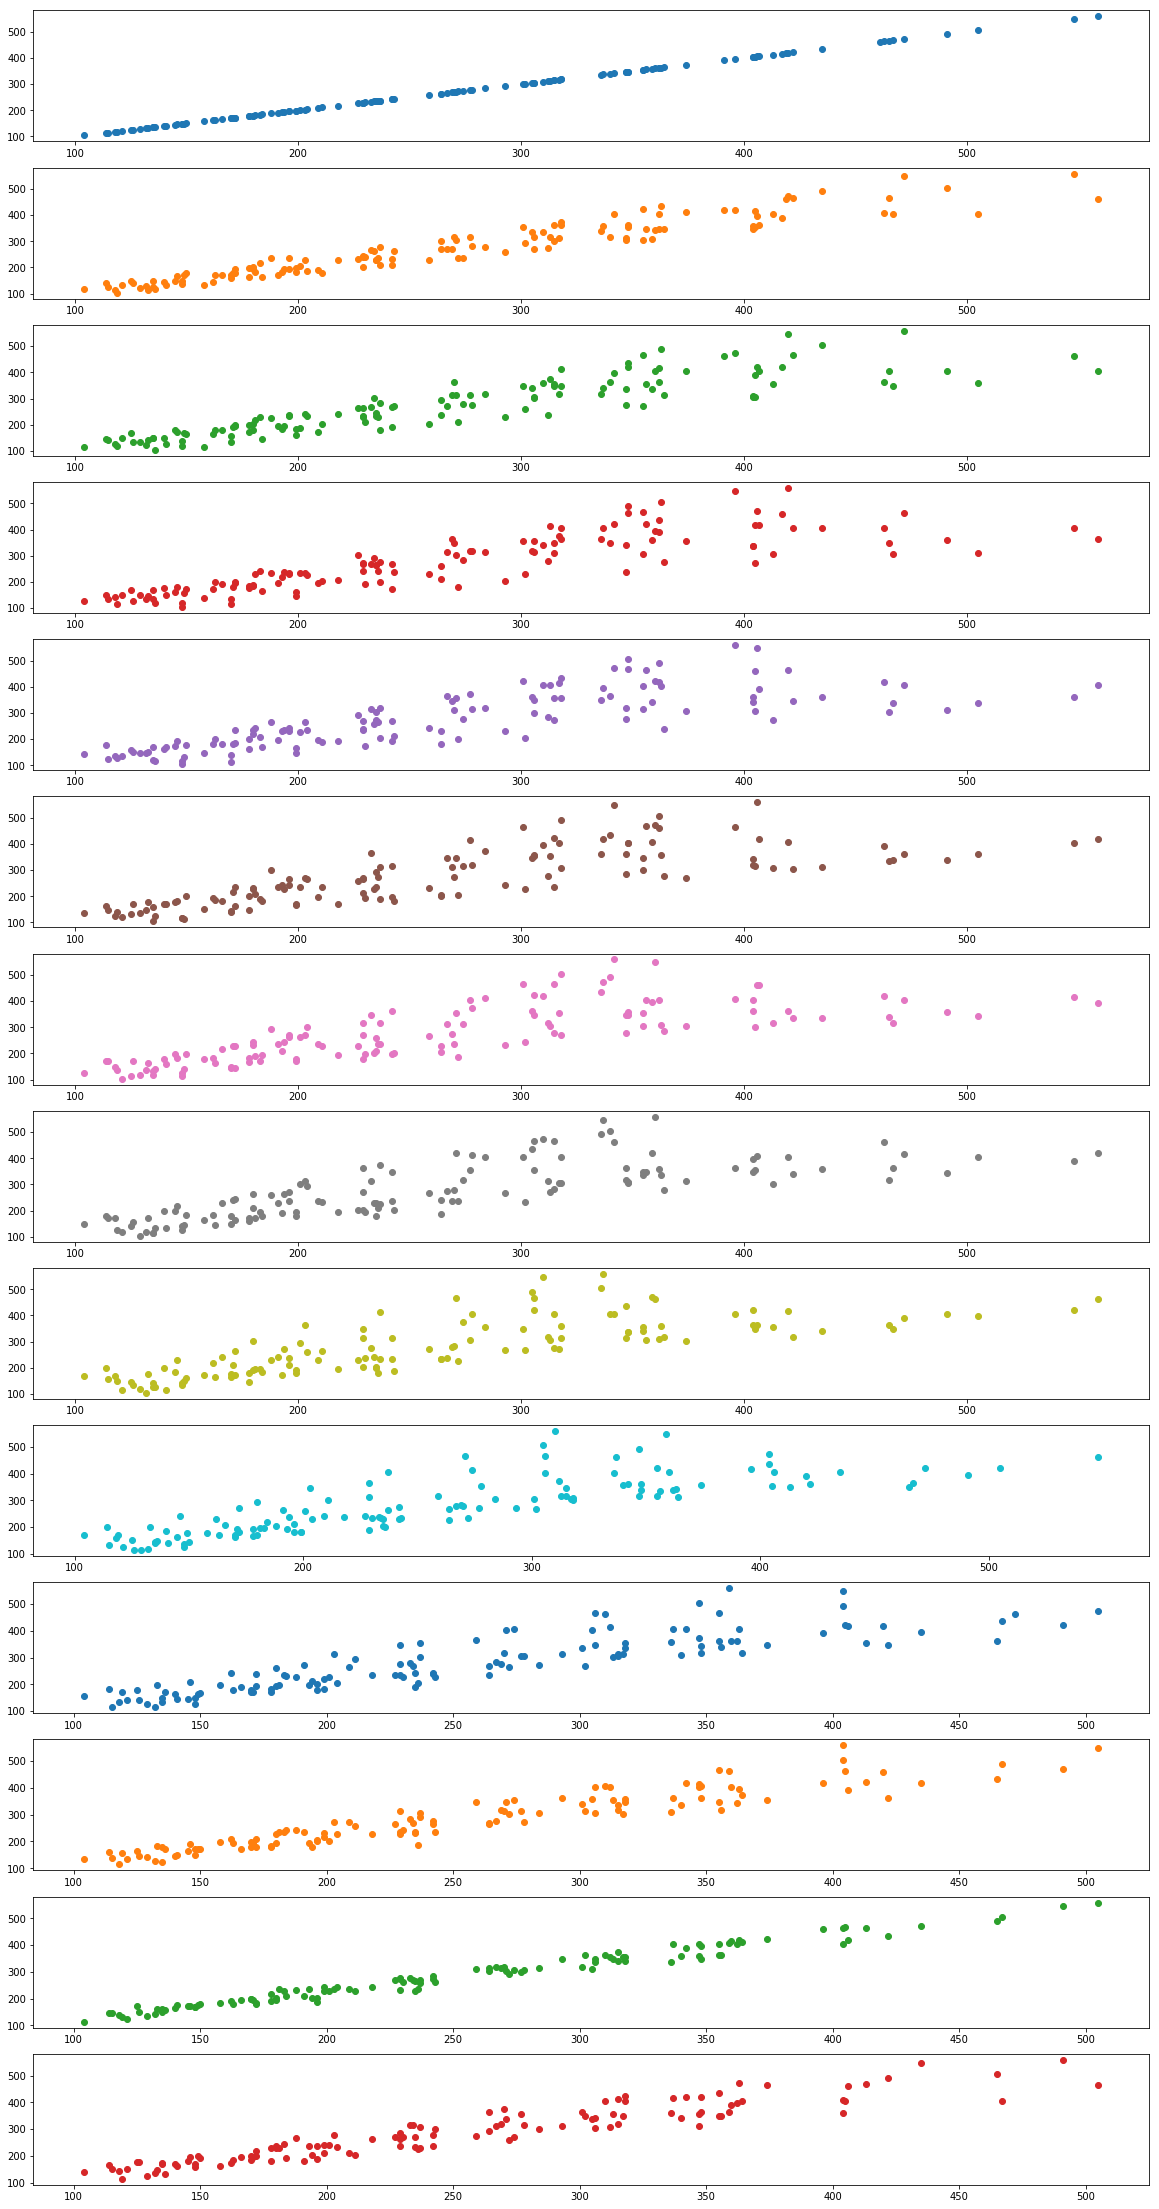

In [32]:
# Полеты по месяцам
fig, axes = plt.subplots(14,1,figsize = (20,40))
for k, ax in enumerate(axes):
    for i in range(k):
        next(ax._get_lines.prop_cycler)
    ax.plot(train_flights.flights,train_flights.flights.shift(-k),'o')


plt.show()

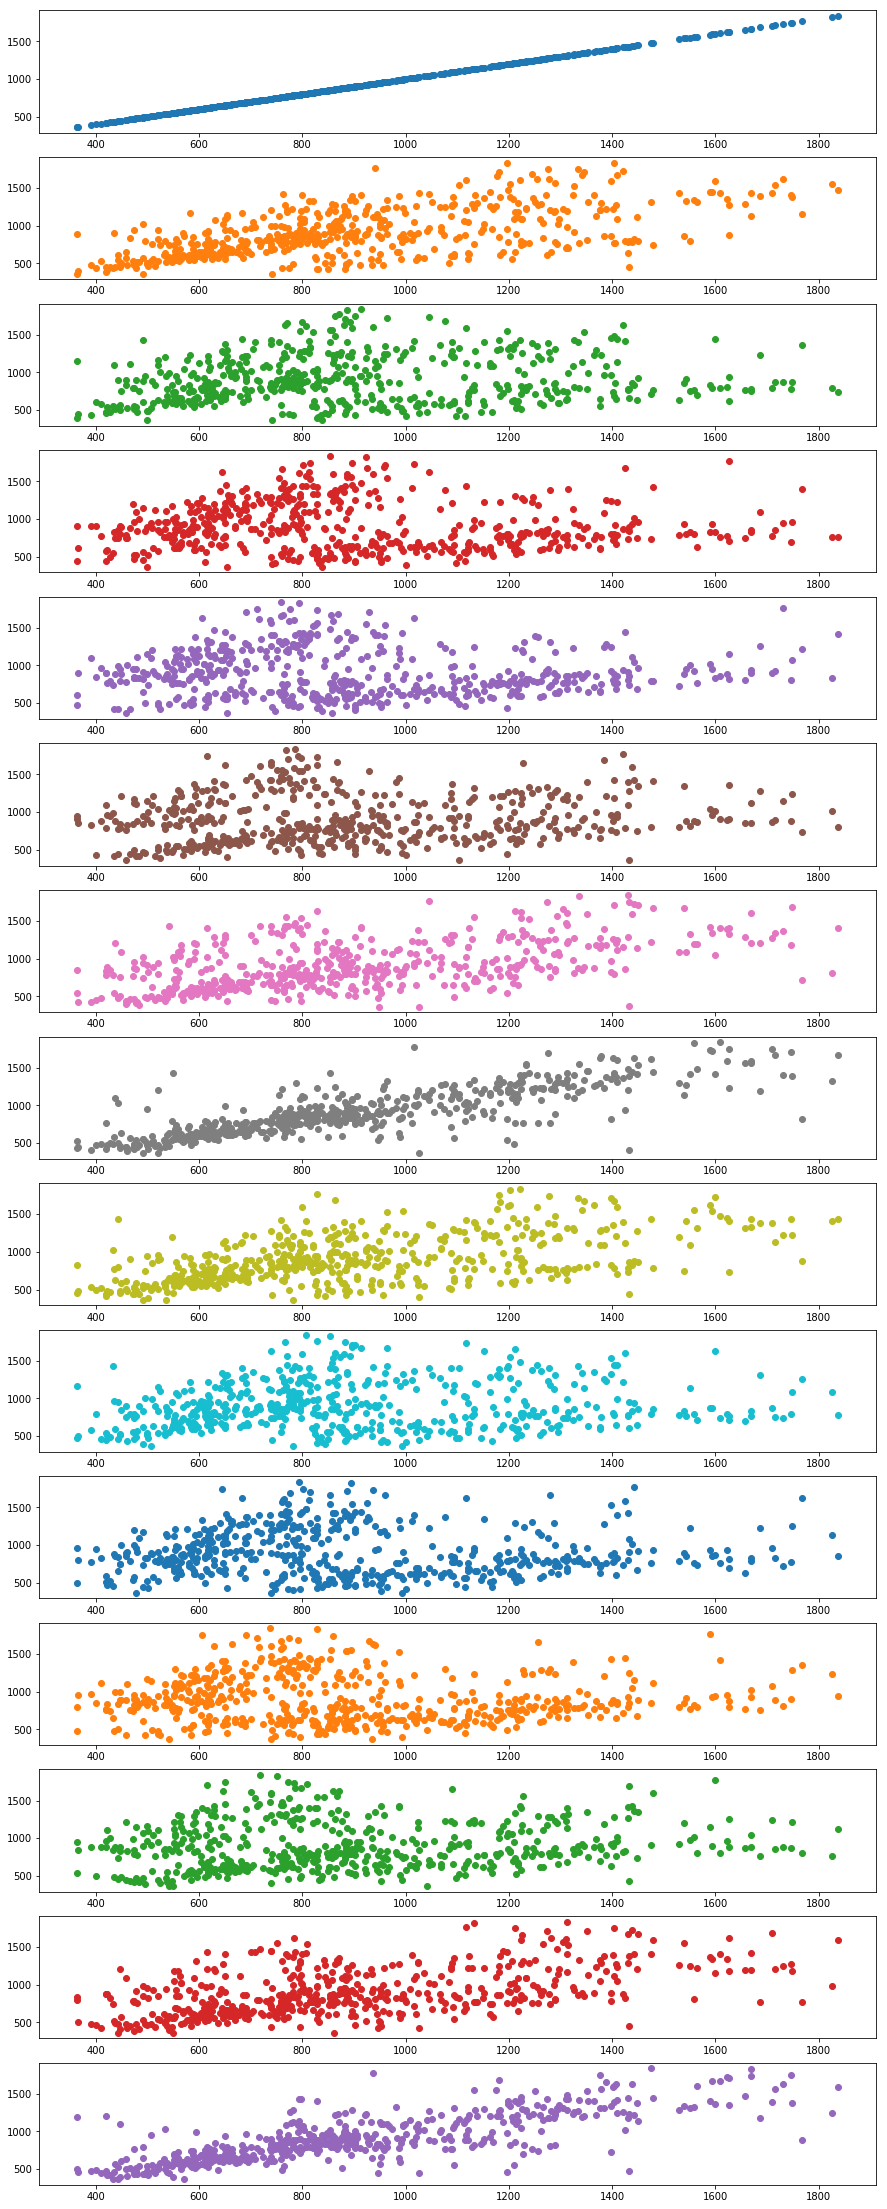

In [33]:
fig, axes = plt.subplots(15,1,figsize = (15,40))
for k, ax in enumerate(axes):
    for i in range(k):
        next(ax._get_lines.prop_cycler)
    ax.plot(train_orders.orders,train_orders.orders.shift(-k),'o')


plt.show()

Автокорреляция - корреляция между исходным рядом и его версией, который сдивнут на некий лаг **t** (лаг автокорреляции).

<img width = '500px' src="images/lesson_10/autocor.png">

### ARIMA

**ARIMA** - AR (Авторегрессия) + I(Интегрирование) + MA(Скользящее среднее). 

Будем строить модель SARIMA, модель, учитывающая сезонность ряда.

Чтобы построить модель нам нужно знать ее порядок, состоящий из 6-х параметров:

- p,P — порядок компоненты AR
- d,D — порядок интегрированного ряда
- q,Q — порядок компонетны MA

##### 1. Интегрирование

Необходимо избавиться от тренда.

<img width = '600px' src="images/lesson_10/diff.png">

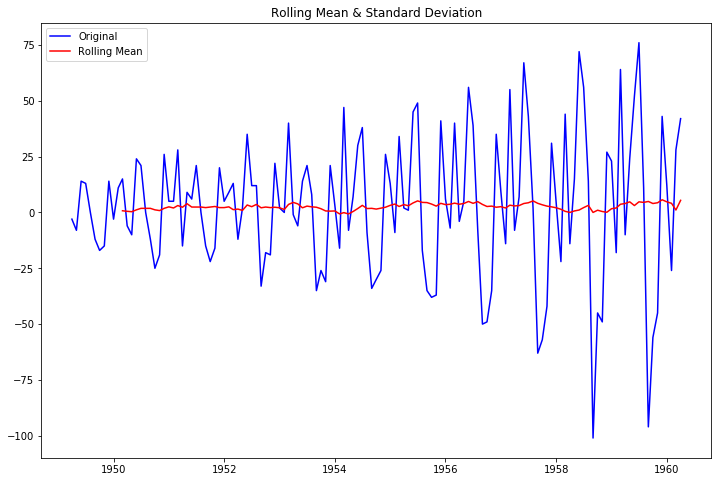

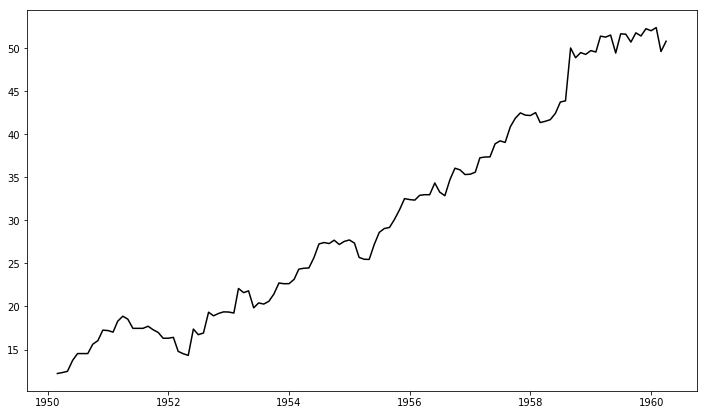

Results of Dickey-Fuller Test:
p-value = 0.0430. The series is likely stationary.
Test Statistic                  -2.920752
p-value                          0.042988
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [368]:
rcParams['figure.figsize'] = 12, 7
train_flights['flights_diff'] = train_flights.flights - train_flights.flights.shift(1)
train_flights.dropna(inplace = True)
test_stationarity(train_flights['flights_diff'], window = 12)

Дисперсия гетероскедастична - необходимо избавиться - прологарифмировав.

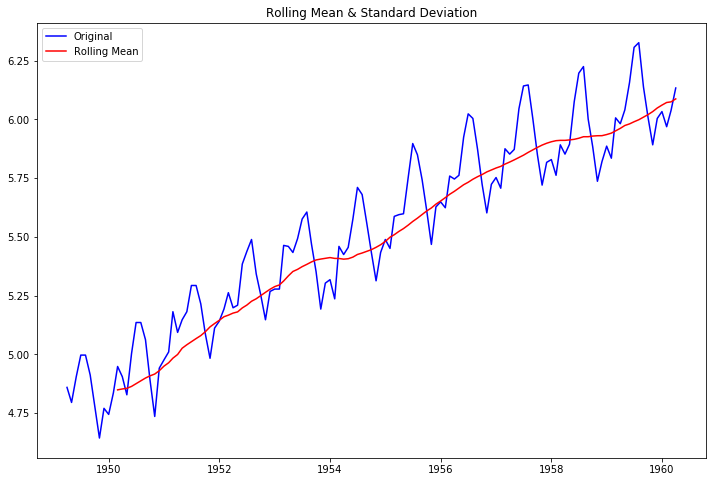

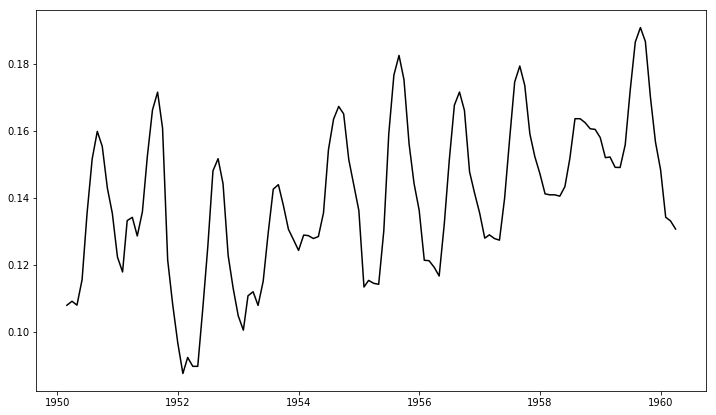

Results of Dickey-Fuller Test:
p-value = 0.2804. The series is likely non-stationary.
Test Statistic                  -2.014141
p-value                          0.280407
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [369]:
train_flights['flights_log'] = np.log(train_flights.flights)
train_flights.dropna(inplace = True)
test_stationarity(train_flights['flights_log'], window = 12)

Теперь уже можно дифференцировать.

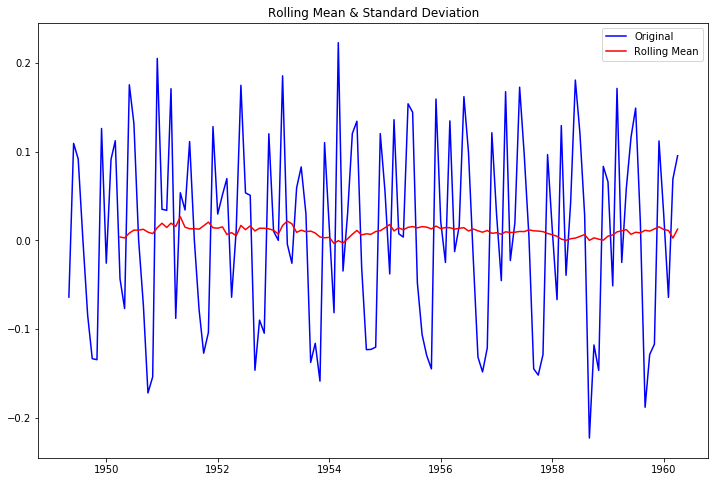

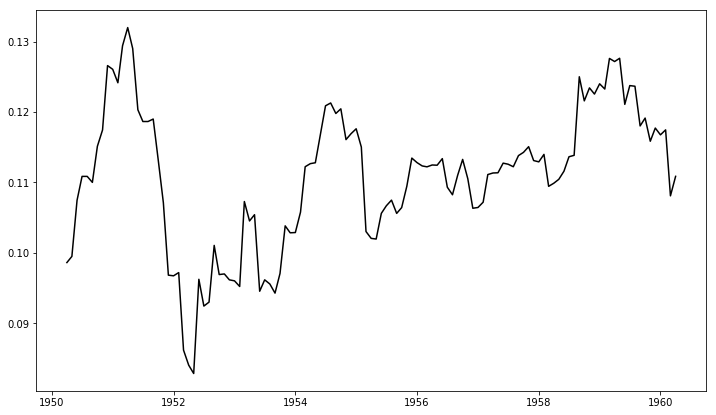

Results of Dickey-Fuller Test:
p-value = 0.0199. The series is likely stationary.
Test Statistic                  -3.201359
p-value                          0.019906
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


In [370]:
train_flights['flights_log_diff'] = train_flights.flights_log - train_flights.flights_log.shift(1)
train_flights.dropna(inplace = True)
test_stationarity(train_flights['flights_log_diff'], window = 12)

**Компонент d = 1, D = 0, так как сезонное дифференцирование мы не делали.**

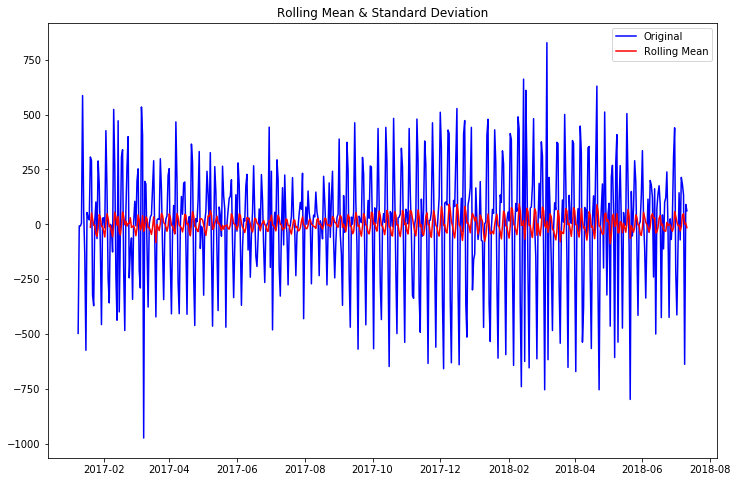

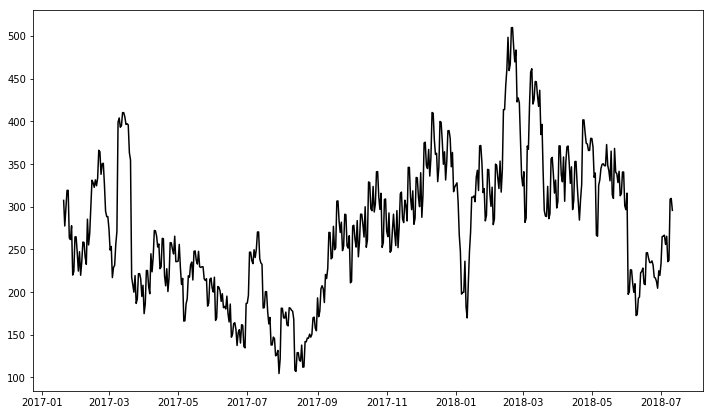

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.178711e+00
p-value                        2.282648e-15
#Lags Used                     1.900000e+01
Number of Observations Used    5.290000e+02
Critical Value (1%)           -3.442772e+00
Critical Value (5%)           -2.867019e+00
Critical Value (10%)          -2.569688e+00
dtype: float64


In [372]:
train_orders['orders_diff'] = train_orders.orders - train_orders.orders.shift(1)
train_orders.dropna(inplace = True)
test_stationarity(train_orders['orders_diff'], window = 12)


**Компонент d = 1, D = 0, так как сезонное дифференцирование мы не делали.**

Все же, если ряд сезонный, то рекомендуется начинать именно с сезонного дифференцирования (D).

##### 2. Авторегрессия (AR - компонент)

Надо понять влияние прошлых периодов на текущий период.

<img width = '500px' src="images/lesson_10/auto.png">

Модель - линейная комбинация **p** предыдущих значений ряда, шумовой компоненты и константы.

*Для p,P и q,Q надо изучить авторкорреляционную(ACF) и частично автокорреляционную(PACF) функции для ряда первых разностей.
ACF поможет нам определить q и Q, т. к. по ее коррелограмме можно определить количество автокорреляционных коэффициентов сильно отличных от 0 в модели MA.
PACF поможет нам определить p и P, т. к. по ее коррелограмме можно определить максимальный номер коэффициента сильно отличный от 0 в модели AR.*

Чтобы определить параметр p (найти его приближение), необходимо обратиться с Частная АвтоКорреляционной Функции.

**Частная автокорреляционная функция** показывает корреляцию между двумя случайными переменными за вычетом влияния всех внутренних значений автокорреляции. 

<img width = '400px' src="images/lesson_10/partial_autocor.png">

Автокорреляция показывает зависимость между y4 и y1, при этом игнорируя эффект от изменения y2 и y3. А частная автокорреляция также показывает эффект между y4 и y1, при этом учитывая, что эффект от y2 и y3 отсутсвует, то есть убирает эффекты y2 и y3.

Рекомендации к подбору первоначальных приближений:

P(p) - номер последнего сезонного (несезонного) лага, при котором частная автокорреляция значима (персекается граница доверительного интервала), при этом стоит учитывать, что большое число компонентов ведет к увеличению сложности модели и переобучению, если Р > 0, то p не может быть больше сезонного лага.

C:\Users\k.izmailov\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


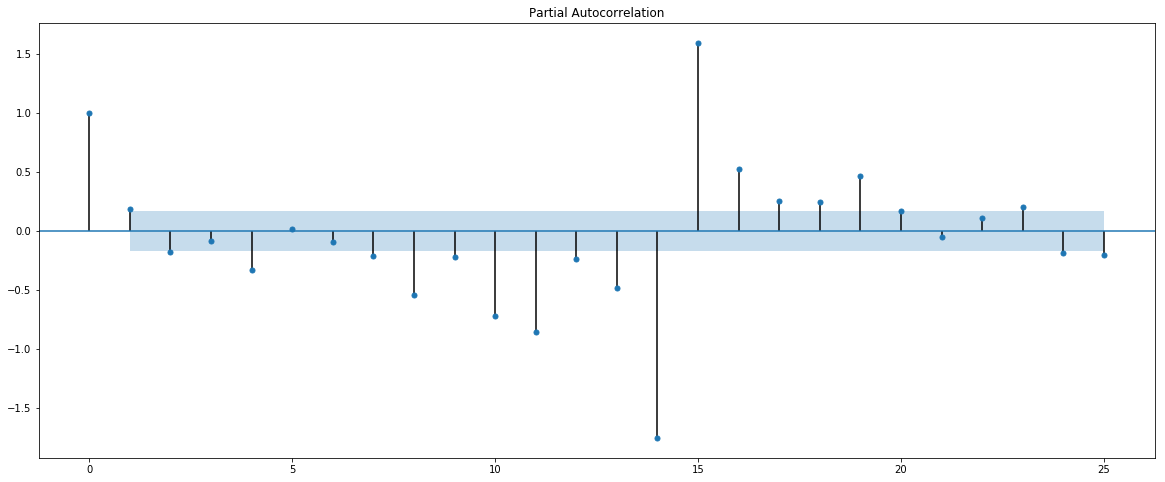

In [143]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_pacf(train_flights.flights_log_diff.values, lags=25,ax = ax)
plt.show()

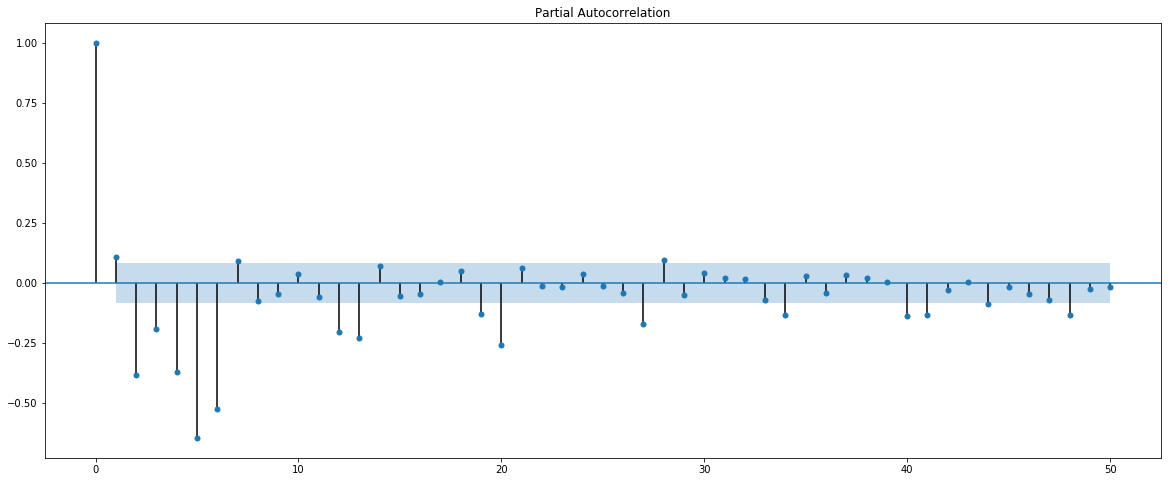

In [144]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_pacf(train_orders.orders_diff.values, lags=50,ax = ax)
plt.show()

##### 3. Скользящее среднее (MA - компонент)

Будем строить модель, как линейную комбинацию **q** последних значений шумовой компоненты. Модель, где используется зависимость между наблюдением и остаточными ошибками от скользящей средней модели применительно к запаздывающим наблюдениям.

<img width = '500px' src="images/lesson_10/ma.png">

Q(q) - номер последнего сезонного (несезонного) лага, при котором автокорреляция значима, если Q > 0, то q не может быть больше сезонного лага.

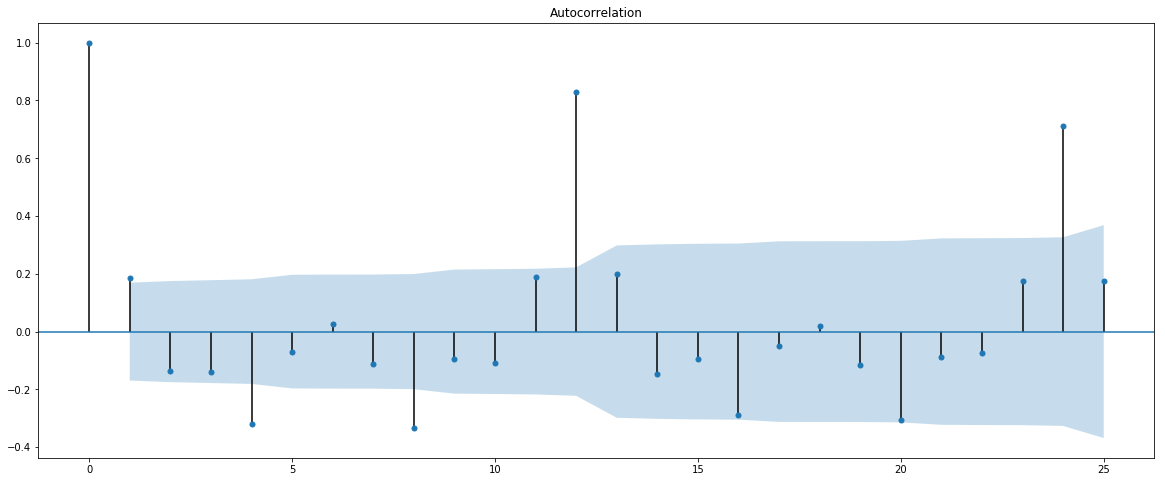

In [145]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_acf(train_flights.flights_log_diff.values, lags=25,ax = ax)
plt.show()

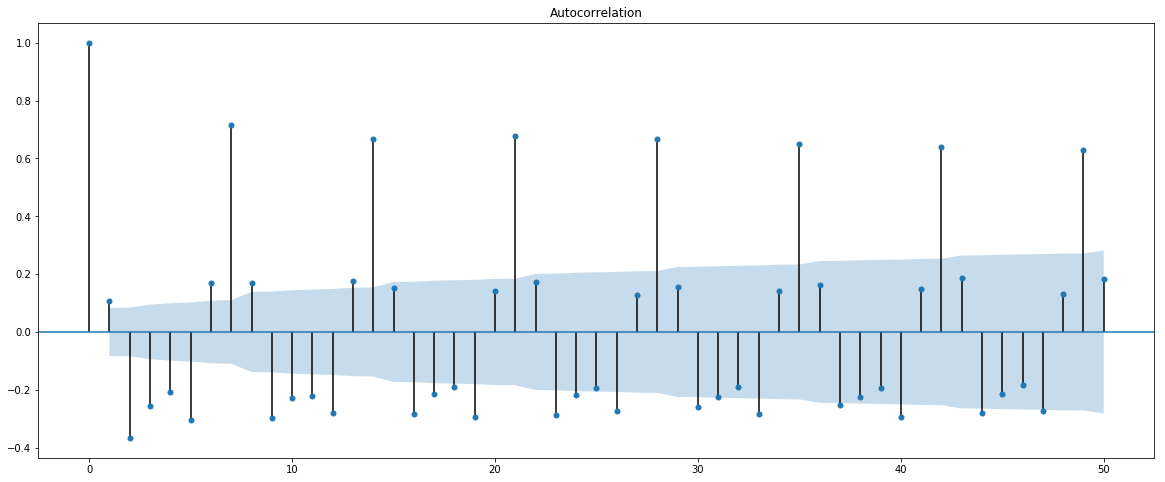

In [146]:
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_acf(train_orders.orders_diff.values, lags=50,ax = ax)
plt.show()

##### 4. Построение прогноза

In [170]:
d = 1
D = 0
s = 12

ps = range(0, 2)
d=1
qs = range(0, 2)
Ps = range(0, 2)
D=0
Qs = range(0, 2)

In [171]:
from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

16

In [172]:
%%time
import warnings
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(train_flights.flights_log, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

Wall time: 4.33 s


In [173]:
print(best_model.summary().tables[0])
print(best_model.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                        flights_log   No. Observations:                  134
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 232.393
Date:                            Fri, 19 Apr 2019   AIC                           -454.785
Time:                                    16:00:41   BIC                           -440.334
Sample:                                03-01-1949   HQIC                          -448.913
                                     - 04-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4605      0.168      2.742      0.006       0.131       0.790
ma.L1         -0.7661      0.134   

Изучим остатки модели, действительно ли они представляют белый шум.

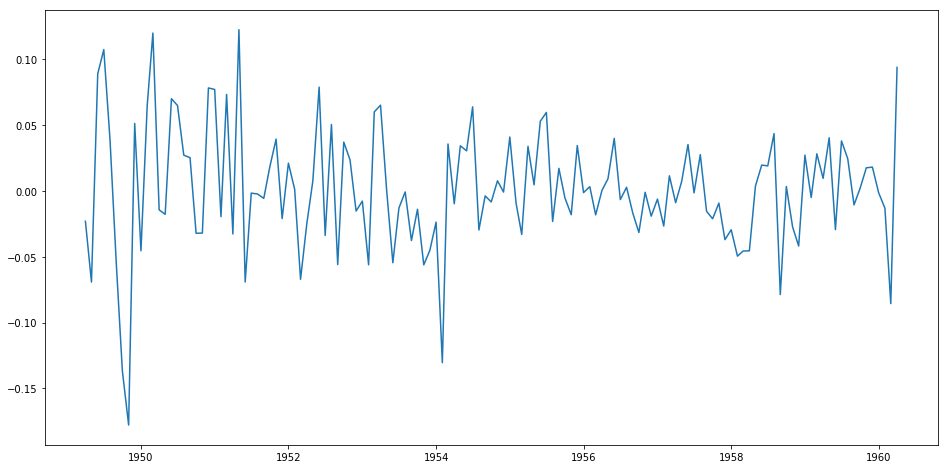

In [176]:
# Остатки модели
plt.figure(figsize=(16,8))
plt.plot(best_model.resid[1:])
plt.show()

In [177]:
stat_test = sm.tsa.adfuller(best_model_flights.resid[:])
print ('adf: ', stat_test[0] )
print ('p-value: ', stat_test[1])
print('Critical values: ', stat_test[4])
if stat_test[0]> stat_test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -9.851630132330062
p-value:  4.469748135995058e-17
Critical values:  {'1%': -3.4808880719210005, '5%': -2.8836966192225284, '10%': -2.5785857598714417}
единичных корней нет, ряд стационарен


In [178]:
forecast = best_model.predict(start = train_flights.shape[0], end = train_flights.shape[0]+test_flights.shape[0])

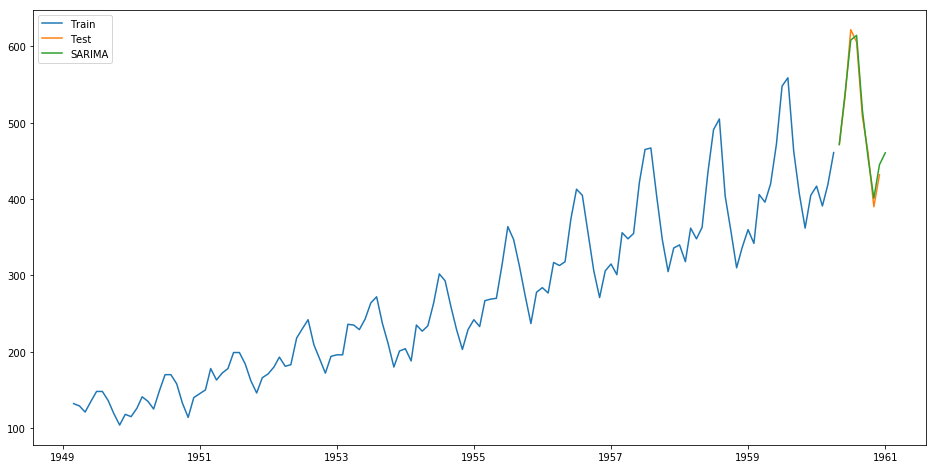

In [180]:
plt.figure(figsize=(16,8))
plt.plot(train_flights.flights, label='Train')
plt.plot(test_flights.flights, label='Test')
plt.plot(np.exp(forecast), label='SARIMA')
plt.legend(loc='best')
plt.show()

In [183]:
%%time
import warnings
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(train_orders.orders, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

Wall time: 4.89 s


In [184]:
print(best_model.summary().tables[0])
print(best_model.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                             orders   No. Observations:                  556
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -3791.730
Date:                            Fri, 19 Apr 2019   AIC                           7591.460
Time:                                    16:11:43   BIC                           7608.736
Sample:                                01-02-2017   HQIC                          7598.209
                                     - 07-11-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4627      0.048      9.664      0.000       0.369       0.557
ma.L1         -0.9526      0.016   

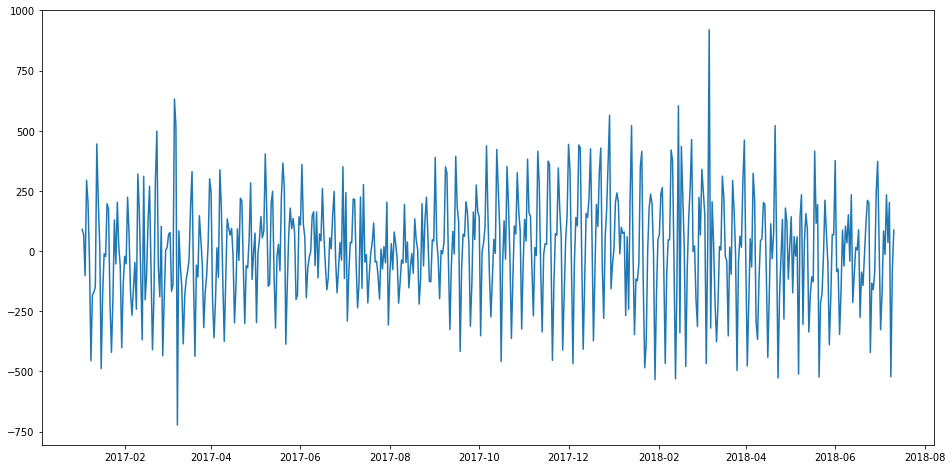

In [185]:
# Остатки модели
plt.figure(figsize=(16,8))
plt.plot(best_model.resid[1:])
plt.show()

In [186]:
stat_test = sm.tsa.adfuller(best_model_flights.resid[:])
print ('adf: ', stat_test[0] )
print ('p-value: ', stat_test[1])
print('Critical values: ', stat_test[4])
if stat_test[0]> stat_test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -9.851630132330062
p-value:  4.469748135995058e-17
Critical values:  {'1%': -3.4808880719210005, '5%': -2.8836966192225284, '10%': -2.5785857598714417}
единичных корней нет, ряд стационарен


In [192]:
forecast = best_model.predict(start = train_orders.shape[0], end = train_orders.shape[0]+test_orders.shape[0])

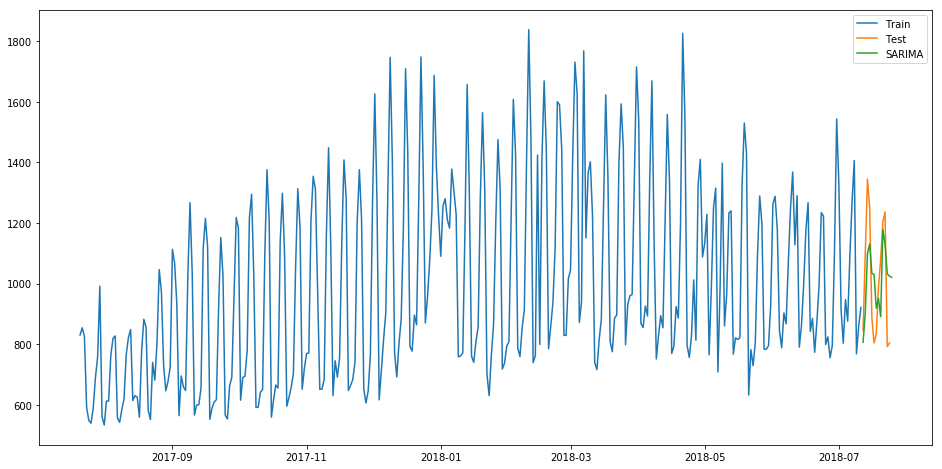

In [197]:
plt.figure(figsize=(16,8))
plt.plot(train_orders.orders[200:], label='Train')
plt.plot(test_orders.orders[:-10], label='Test')
plt.plot(forecast[:-10], label='SARIMA')
plt.legend(loc='best')
plt.show()

### Задание

https://www.kaggle.com/c/restaurant-orders-prediciton-2